# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

****

In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [11]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']

clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/silasneptune/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


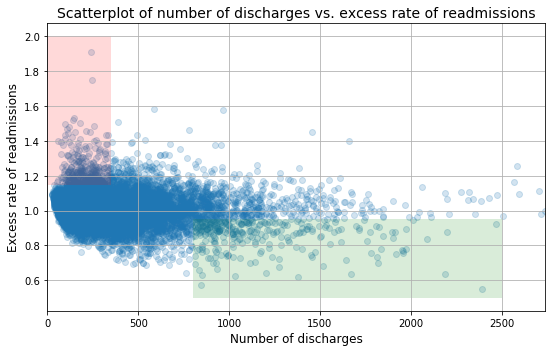

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [12]:
hospital_read_df.info()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


## A. Do you agree with the above analysis and recommendations? Why or why not?

#### Just by looking at the provided information and graph, I am not convinced that there is a significant correlation between number of discharges (how capacity is based) and number of readmissions. If this was tested true along with tests for outliers, I think the suggestions are appropriate.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

Null Hypothesis: There is no difference of the means excess rate between hospital with capacity > 1000 and < 100.

Alt Hypothesis: There is a difference of the means excess rate between hospital with capacity > 1000 and < 100.

In [23]:
#Create dfs of hospitals with less than 100 discharges and more than 1000 discharges
d100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & 
                                     (clean_hospital_read_df['Number of Discharges'] > 0)] #This removes the missing data
d1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]

#Find means and variances for both
mean_d100 = d100['Excess Readmission Ratio'].mean()
mean_d1000 = d1000['Excess Readmission Ratio'].mean()
var_d100 = d100['Excess Readmission Ratio'].var()
var_d1000 = d1000['Excess Readmission Ratio'].var()


print(mean_d100, ' is the mean excess readmission ratio of hospitals with less than 100 discharges')
print(var_d100, ' is the variance of the err with less than 100')

print(mean_d1000, ' is the mean excess readmission ratio of hospitals with more than 1000 discharges')
print(var_d1000, ' is the variance of the err with more than 1000')

diff = mean_data_100 - mean_data_1000
print('The difference in means between <100 and >1000 is ', diff)

1.0226183501683506  is the mean excess readmission ratio of hospitals with less than 100 discharges
0.0033615184329960682  is the variance of the err with less than 100
0.9783354211663071  is the mean excess readmission ratio of hospitals with more than 1000 discharges
0.014401764889811413  is the variance of the err with more than 1000
The difference in means between <100 and >1000 is  0.04428292900204345


### 2. Compute and report the observed significance value (or p-value).

In [28]:
# Perform two sample t-test
t_stat, p_value = stats.ttest_ind(data_100["Excess Readmission Ratio"], data_1000["Excess Readmission Ratio"])
print("The t score is ", t_stat, " and the p-value is ", p_value)

The t score is  10.0606203985  and the p-value is  3.77875392334e-23


### 3. Report statistical significance for  α= .01

With a p-value < 0.01 (alpha), we can reject the null hypothesis and conclude that there is a significant difference in means between hospitals with < 100 discarges and > 1000.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance is pretty easy to prove, but practical significance really depends on who you ask. Remember the difference in means is 0.04428 excess ratio. This is a very slight number, and the reason the trend was not discernable in the original plot given. While I would still suggest the same things, I would really explain how small of a difference (but definitely a difference) there is between the two groups of hospitals. If readmission rates cost a staggering amount to hospitals or something it may still be worth implementing new policy.

### Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?

The plot gives a very good overall view of the data and is easy to read. It gives a decent view of the distribution along with singling out the green and red sections as good and bad. The downside to this graph is that because the difference in mean is so slight, it does not show on this graph. It does not convey the informtation that we are trying to show. A thing to add to the graph would be a linear regression line to really show the trend. The graph below is basically the same graph, but the regression lline helps visualize the overall trend.

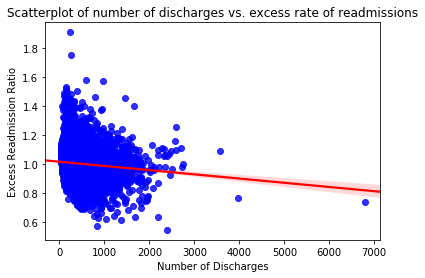

In [39]:
ax = sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set_title('Scatterplot of number of discharges vs. excess rate of readmissions')